**In this notebook, the idea is to apply the Gradient Descent algorithm to both a one-variable cost function and a multiple-variable cost function**

Load necessary packages

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

**One-variable case**

Define a one-variable function

In [10]:
def f(w):
    return w**4 - w**3 - 6*w**2 + 5

Take a look at the function with a [-3, 3] domain. We can see that there is a global minimum and a local minimun.

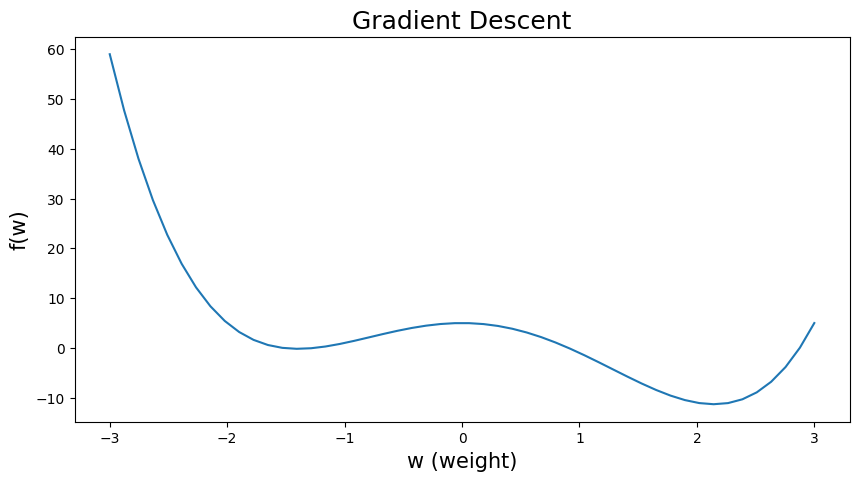

In [11]:
domain = np.linspace(-3, 3, 50)
plt.figure(figsize=(10,5))
plt.plot(domain, f(domain))
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.title("Gradient Descent", fontsize = 18)
plt.show()

Build the gradient descent algorithm

In [12]:
def df(w):
    return 4*w**3 - 3*w**2 - 12*w

def gradient_descent(derivative, W, alpha = 0.8, max_iter = 1_000):
    i = 0
    W_hist = [W]
    while i < max_iter:
        W = W - alpha*df(W)
        i += 1
        W_hist.append(W)
    
    return W_hist

We first test an initial guess of w = -2.5

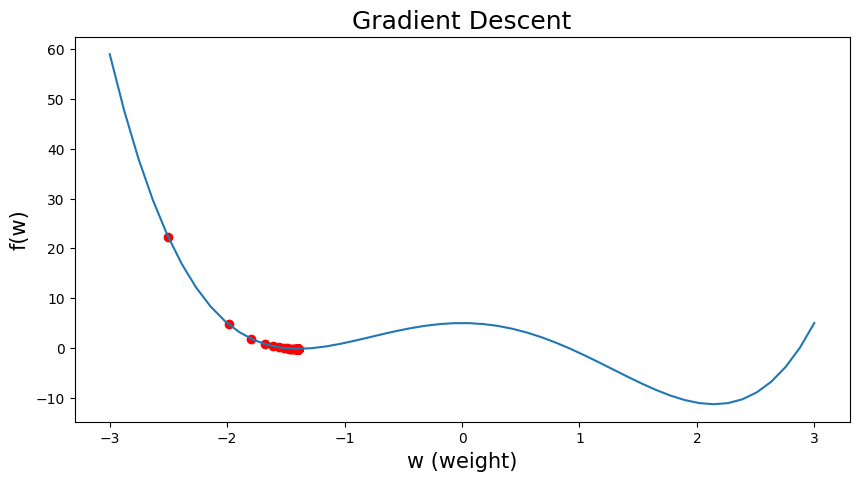

In [13]:
W = np.array(gradient_descent(df, -2.5, alpha = 0.01, max_iter = 500))

domain = np.linspace(-3, 3, 50)
plt.figure(figsize=(10,5))
plt.plot(domain, f(domain))
plt.scatter(W, f(W), color = "red")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.title("Gradient Descent", fontsize = 18)
plt.show()

<span style="color: blue;">Interestingly, we can find that the gradient descent helps us to find the minimum cost, but it is a local minimum.</span>

We change to a initial guess of w = 1.

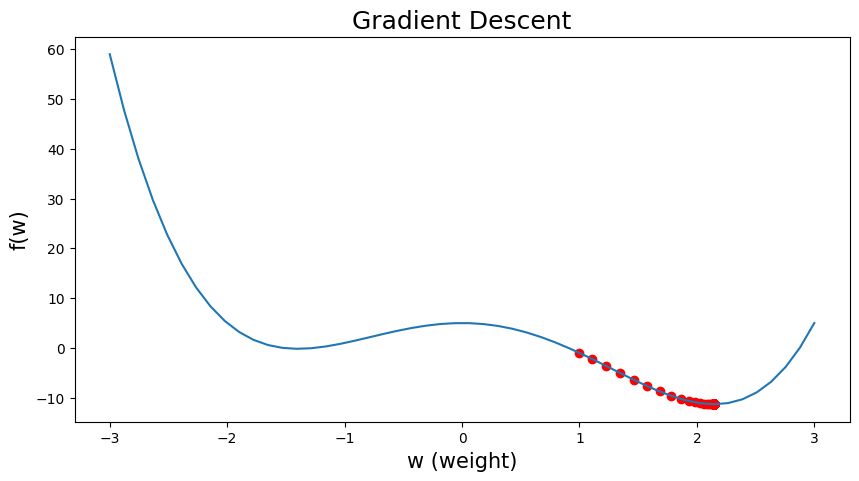

In [14]:
W = np.array(gradient_descent(df, 1, alpha = 0.01, max_iter = 500))

domain = np.linspace(-3, 3, 50)
plt.figure(figsize=(10,5))
plt.plot(domain, f(domain))
plt.scatter(W, f(W), color = "red")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.title("Gradient Descent", fontsize = 18)
plt.show()

<span style="color: blue;">Therefore, we successfully find the global mininum. **We illustrate that gradient descent is useful to find the mininums of a cost function, but sometimes it can be trapped in a local minimun.**</span>

**Two-variable case**

Define and plot a two-variable function

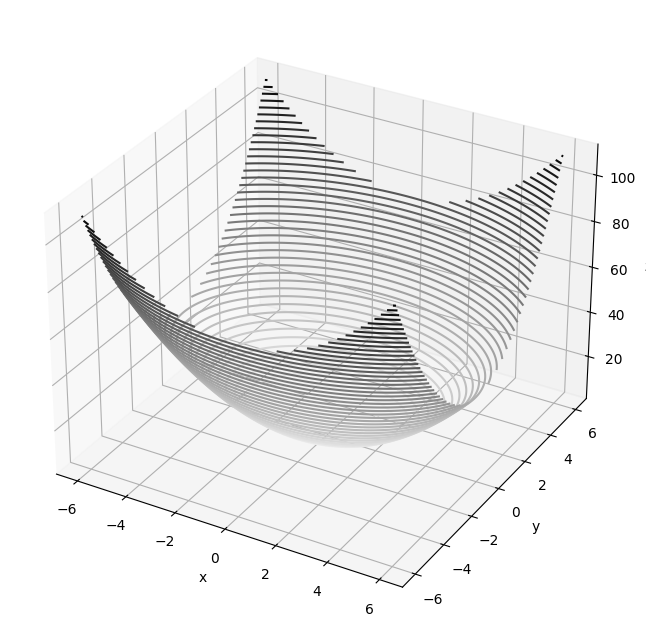

In [15]:
def f(w_0, w_1):
    return w_0**2 + 2*w_1**2 + 3

x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap = "binary")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.show()

Apply the Gradient Descent and plot

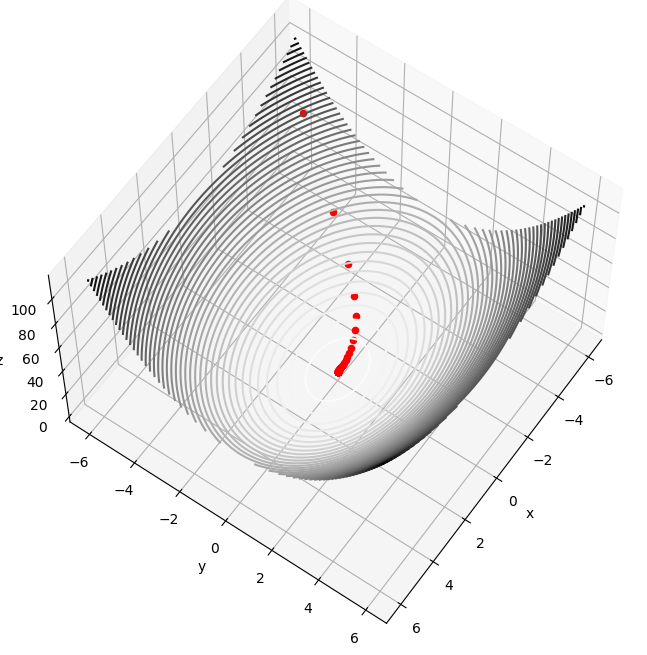

In [16]:
def df(w):
    grad = [2*w[0], 4*w[1]]
    return np.array(grad)

W = gradient_descent(df, np.array([-5,-5]), alpha=0.1,max_iter=500)

x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap = "binary")
for i in range(len(W)):
    ax.scatter3D([W[i][0]],
                 [W[i][1]],
                 f(W[i][0],W[i][1]), color = "red")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.view_init(60, 35)
plt.show()

<span style="color: blue;">Therefore, we successfully find the global mininum.</span>

---

### Conclusion

In summary, we have shown that the Gradient Descent is a useful method to find the mininums. However, we need to be careful that we may be trapped in local minimum if the cost function is not convex.